In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
# Load the dataset
df = pd.read_csv("D:\\myntradata\\FashionDataset.csv")

In [2]:
df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14330 entries, 0 to 14329
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14330 non-null  int64  
 1   p_id          14312 non-null  float64
 2   name          14312 non-null  object 
 3   price         14312 non-null  float64
 4   colour        14309 non-null  object 
 5   brand         14312 non-null  object 
 6   img           14312 non-null  object 
 7   ratingCount   6581 non-null   float64
 8   avg_rating    6581 non-null   float64
 9   description   14312 non-null  object 
 10  p_attributes  14312 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


In [4]:
# 1. Data preprocessing
df.dropna(inplace=True)
df = df.drop(['name'], axis=1)  # Dropping 'name' column as it's repeated in description

In [5]:
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0          p_id         price   ratingCount   avg_rating
count  6581.000000  6.581000e+03   6581.000000   6581.000000  6581.000000
mean    414.312263  1.415573e+07   2485.599757    184.479410     4.101226
std     280.994433  3.162796e+06   1847.523179    782.501137     0.475633
min       0.000000  8.001500e+04    199.000000      1.000000     1.000000
25%     162.000000  1.277345e+07   1495.000000      9.000000     3.888889
50%     385.000000  1.465063e+07   1999.000000     23.000000     4.180822
75%     644.000000  1.635190e+07   2899.000000     80.000000     4.392857
max     989.000000  1.926687e+07  33350.000000  21274.000000     5.000000


In [6]:
df.head()

,Unnamed: 0,p_id,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6581 entries, 0 to 14325
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6581 non-null   int64  
 1   p_id          6581 non-null   float64
 2   price         6581 non-null   float64
 3   colour        6581 non-null   object 
 4   brand         6581 non-null   object 
 5   img           6581 non-null   object 
 6   ratingCount   6581 non-null   float64
 7   avg_rating    6581 non-null   float64
 8   description   6581 non-null   object 
 9   p_attributes  6581 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 565.6+ KB


In [8]:
# 2. Convert description and p_attributes to tokens
df['combined_text'] = df['description'] + ' ' + df['p_attributes']
vectorizer = TfidfVectorizer(stop_words='english')
text_matrix = vectorizer.fit_transform(df['combined_text'])

In [9]:
df.head()

,Unnamed: 0,p_id,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,combined_text
0,0,17048614.0,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",Black printed Kurta with Palazzos with dupatta...
1,1,16524740.0,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",Orange solid Kurta with Palazzos with dupatta<...
2,2,16331376.0,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",Navy blue embroidered Kurta with Trousers with...
3,3,14709966.0,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",Red printed kurta with trouser and dupatta<br>...
4,4,11056154.0,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size...","Black and green printed straight kurta, has a ..."


In [10]:
# 3. Prepare numerical features
numerical_features = ['price', 'ratingCount', 'avg_rating']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

In [11]:
print(scaled_features)

[[1.47808513e-01 2.12522916e-01 8.54599735e-01]
 [1.71940515e-01 5.07685799e-02 7.79833488e-01]
 [1.41775512e-01 8.23109105e-02 7.90382420e-01]
 ...
 [4.82640041e-02 8.46142998e-04 7.76315789e-01]
 [5.73135049e-02 1.88031777e-04 1.00000000e+00]
 [6.33465054e-02 5.64095332e-04 7.69230769e-01]]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6581 entries, 0 to 14325
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6581 non-null   int64  
 1   p_id           6581 non-null   float64
 2   price          6581 non-null   float64
 3   colour         6581 non-null   object 
 4   brand          6581 non-null   object 
 5   img            6581 non-null   object 
 6   ratingCount    6581 non-null   float64
 7   avg_rating     6581 non-null   float64
 8   description    6581 non-null   object 
 9   p_attributes   6581 non-null   object 
 10  combined_text  6581 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 617.0+ KB


In [13]:
# Calculate cosine similarity
combined_features = np.hstack((text_matrix.toarray(), scaled_features))
similarity_matrix = cosine_similarity(combined_features)

In [14]:
print(similarity_matrix)

[[1.         0.88958209 0.85839497 ... 0.51103478 0.52491858 0.47881059]
 [0.88958209 1.         0.86133662 ... 0.48857218 0.51531634 0.46862491]
 [0.85839497 0.86133662 1.         ... 0.49274878 0.50186366 0.44864532]
 ...
 [0.51103478 0.48857218 0.49274878 ... 1.         0.72397912 0.66313082]
 [0.52491858 0.51531634 0.50186366 ... 0.72397912 1.         0.73713225]
 [0.47881059 0.46862491 0.44864532 ... 0.66313082 0.73713225 1.        ]]


In [15]:
similarity_df = pd.DataFrame(similarity_matrix, index=range(len(combined_features)), columns=range(len(combined_features)))

# Print the DataFrame
print("Cosine Similarity Matrix:")
print(similarity_df)

Cosine Similarity Matrix:
          0         1         2         3         4         5         6     \
0     1.000000  0.889582  0.858395  0.860782  0.539532  0.834567  0.742235   
1     0.889582  1.000000  0.861337  0.827350  0.433239  0.786301  0.730301   
2     0.858395  0.861337  1.000000  0.846851  0.466660  0.765368  0.717134   
3     0.860782  0.827350  0.846851  1.000000  0.543649  0.865361  0.723961   
4     0.539532  0.433239  0.466660  0.543649  1.000000  0.608636  0.414344   
...        ...       ...       ...       ...       ...       ...       ...   
6576  0.489751  0.500713  0.473475  0.473999  0.419012  0.478853  0.409827   
6577  0.454262  0.473784  0.460232  0.445299  0.449722  0.425449  0.402515   
6578  0.511035  0.488572  0.492749  0.509610  0.501655  0.496196  0.450419   
6579  0.524919  0.515316  0.501864  0.487691  0.424095  0.494243  0.443403   
6580  0.478811  0.468625  0.448645  0.444460  0.386537  0.447575  0.400322   

          7         8         9     .

In [16]:
def recommend_item(image_id, user_preference, k=5):
    # Find the index of the input image_id
    item_index = df[df['p_id'] == image_id].index[0]
    
    # Get similarity scores for the item
    item_scores = list(enumerate(similarity_matrix[item_index]))
    
    # Sort the scores in descending order
    sorted_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)
    
    # Remove the input item itself
    sorted_scores = [score for score in sorted_scores if score[0] != item_index]
    
    if user_preference == 1:
        # User liked the item, recommend the next best item
        recommended_index = sorted_scores[0][0]
    elif user_preference == 0:
        # User is neutral, recommend the k-1 th item
        recommended_index = sorted_scores[k-2][0]
    else:  # user_preference == -1
        # User disliked the item, recommend the least similar item
        recommended_index = sorted_scores[k+1][0]
    
    recommended_item = df.iloc[recommended_index]
    return recommended_item

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("D:\\myntradata\\FashionDataset.csv")

# 1. Data preprocessing
df.dropna(inplace=True)
df = df.drop(['name'], axis=1)  # Dropping 'name' column as it's repeated in description

# 2. Convert description and p_attributes to tokens
df['combined_text'] = df['description'] + ' ' + df['p_attributes']
vectorizer = TfidfVectorizer(stop_words='english')
text_matrix = vectorizer.fit_transform(df['combined_text'])

# 3. Prepare numerical features
numerical_features = ['price', 'ratingCount', 'avg_rating']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Combine text features and numerical features
combined_features = np.hstack((text_matrix.toarray(), scaled_features))

# Calculate cosine similarity
similarity_matrix = cosine_similarity(combined_features)

def recommend_item(image_id, user_preference, k=5):
    # Find the index of the input image_id
    item_index = df[df['p_id'] == image_id].index[0]
    
    # Get similarity scores for the item
    item_scores = list(enumerate(similarity_matrix[item_index]))
    
    # Sort the scores in descending order
    sorted_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)
    
    # Remove the input item itself
    sorted_scores = [score for score in sorted_scores if score[0] != item_index]
    
    if user_preference == 1:
        # User liked the item, recommend the next best item
        recommended_index = sorted_scores[0][0]
    elif user_preference == 0:
        # User is neutral, recommend the k-1 th item
        recommended_index = sorted_scores[k-2][0]
    else:  # user_preference == -1
        # User disliked the item, recommend the least similar item
        recommended_index = sorted_scores[k+1][0]
    
    recommended_item = df.iloc[recommended_index]
    return recommended_item



In [27]:
# Example usage
image_id = 9867983  # Replace with actual image_id
user_preference = 1  # 1 for like, 0 for neutral, -1 for dislike

recommended_item = recommend_item(image_id, user_preference)
print(f"Recommended item:\n{recommended_item[['p_id', 'price', 'colour', 'brand']]}")
print(recommended_item['img'])

Recommended item:
p_id                     18156520.0
price                        3999.0
colour               Turquoise Blue
brand     AMIRAS INDIAN ETHNIC WEAR
Name: 533, dtype: object
http://assets.myntassets.com/assets/images/18156520/2022/6/7/82bd56f2-b527-4112-b736-00f91142e5b31654579590114TshirtsPIRKOWomenTshirtsPIRKOWomenTshirtsPIRKOWomenTshirtsPI1.jpg


In [28]:
# Example usage
image_id = 18156520  # Replace with actual image_id
user_preference = 1  # 1 for like, 0 for neutral, -1 for dislike

recommended_item = recommend_item(image_id, user_preference)
print(f"Recommended item:\n{recommended_item[['p_id', 'price', 'colour', 'brand']]}")
print(recommended_item['img'])

Recommended item:
p_id        15636298.0
price           6999.0
colour            Grey
brand     Rudra Bazaar
Name: 621, dtype: object
http://assets.myntassets.com/assets/images/15636298/2021/9/28/99d51576-2c0a-4462-91cb-77656060db431632811649165RudraBazaarWomenGreyFloralPrintedPanelledGottaPattiPureCotto1.jpg


In [25]:
# Example usage
image_id = 15636298  # Replace with actual image_id
user_preference = 0  # 1 for like, 0 for neutral, -1 for dislike

recommended_item = recommend_item(image_id, user_preference)
print(f"Recommended item:\n{recommended_item[['p_id', 'price', 'colour', 'brand']]}")
print(recommended_item['img'])


Recommended item:
p_id      17455814.0
price         1699.0
colour       Mustard
brand          Anouk
Name: 205, dtype: object
http://assets.myntassets.com/assets/images/17455814/2022/6/2/f4d393b5-c3ed-4ee1-9dc5-8f93b936acca1654147418141-Anouk-Women-Mustard-Yellow-Pure-Cotton-Kurta-with-Trousers-2-1.jpg


In [26]:
# Example usage
image_id = 17455814  # Replace with actual image_id
user_preference = -1  # 1 for like, 0 for neutral, -1 for dislike

recommended_item = recommend_item(image_id, user_preference)
print(f"Recommended item:\n{recommended_item[['p_id', 'price', 'colour', 'brand']]}")
print(recommended_item['img'])

Recommended item:
p_id      14884580.0
price         2599.0
colour        Orange
brand          Anouk
Name: 776, dtype: object
http://assets.myntassets.com/assets/images/14884580/2021/10/21/bc7abf0e-a33c-44c1-b6df-603cf7a9c2bb1634816164958-Anouk-Women-Kurta-Sets-3341634816164054-1.jpg


In [25]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


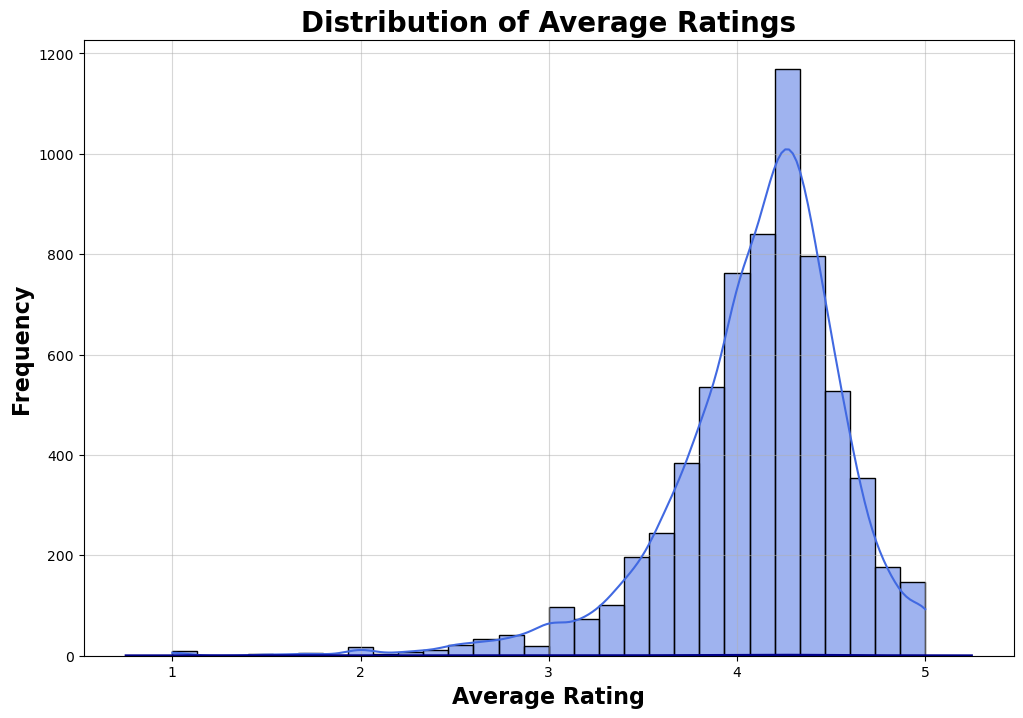

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')

    # Set a classic style for the plot
#plt.style.use('classic')
#sns.set_context("talk", font_scale=1.2)

    # Plot the average ratings
plt.figure(figsize=(12, 8))
sns.histplot(df['avg_rating'].dropna(), bins=30, kde=True, color='royalblue', edgecolor='black')
    
    # Customize the plot
plt.title('Distribution of Average Ratings', fontsize=20, weight='bold')
plt.xlabel('Average Rating', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, alpha=0.5)

    # Adding KDE line with customization
sns.kdeplot(df['avg_rating'].dropna(), color='darkblue', lw=2)

    # Show the plot
plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_22800\3671708431.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


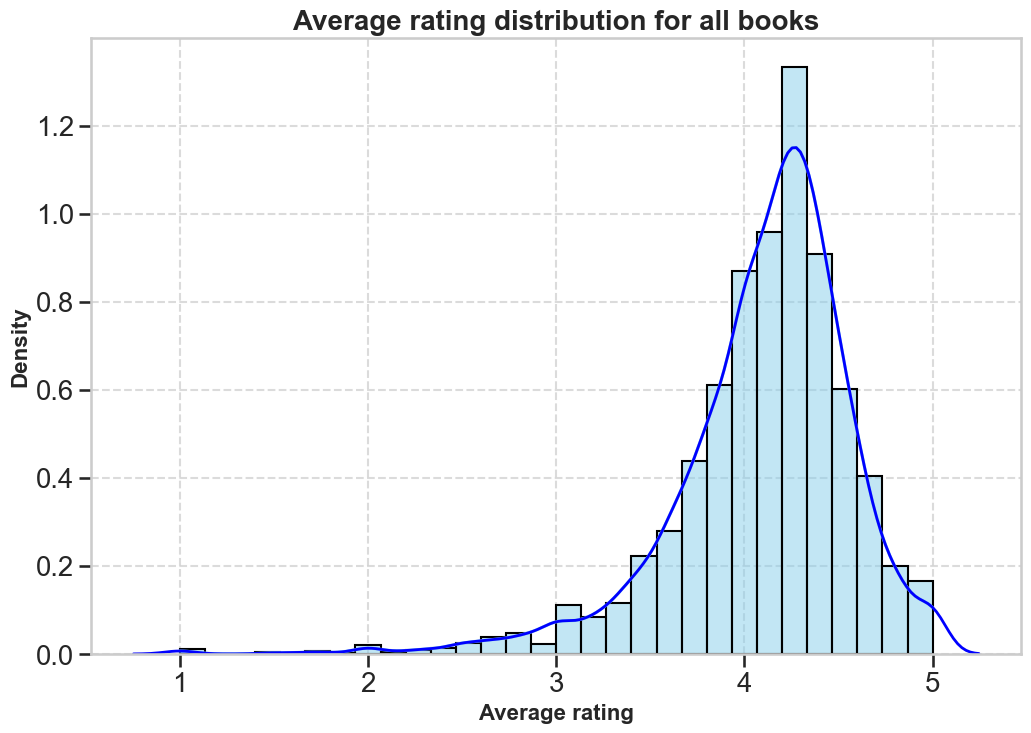

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure 'avg_rating' column exists and is numeric
if 'avg_rating' in df.columns:
    df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')

    # Set a style for the plot
    plt.style.use('seaborn-whitegrid')
    sns.set_context("talk", font_scale=1.2)

    # Plot the average ratings
    plt.figure(figsize=(12, 8))
    sns.histplot(df['avg_rating'].dropna(), bins=30, kde=True, color='skyblue',  stat='density')

    # Customize the plot
    plt.title('Average rating distribution for all books', fontsize=20, weight='bold')
    plt.xlabel('Average rating', fontsize=16, weight='bold')
    plt.ylabel('Density', fontsize=16, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding KDE line with customization
    sns.kdeplot(df['avg_rating'].dropna(), color='blue', lw=2)

    # Show the plot
    plt.show()
else:
    print("The dataset does not contain an 'avg_rating' column.")


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6581 entries, 0 to 14325
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6581 non-null   int64  
 1   p_id           6581 non-null   float64
 2   price          6581 non-null   float64
 3   colour         6581 non-null   object 
 4   brand          6581 non-null   object 
 5   img            6581 non-null   object 
 6   ratingCount    6581 non-null   float64
 7   avg_rating     6581 non-null   float64
 8   description    6581 non-null   object 
 9   p_attributes   6581 non-null   object 
 10  combined_text  6581 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 617.0+ KB


C:\Users\ishan\AppData\Local\Temp\ipykernel_22800\1508690363.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


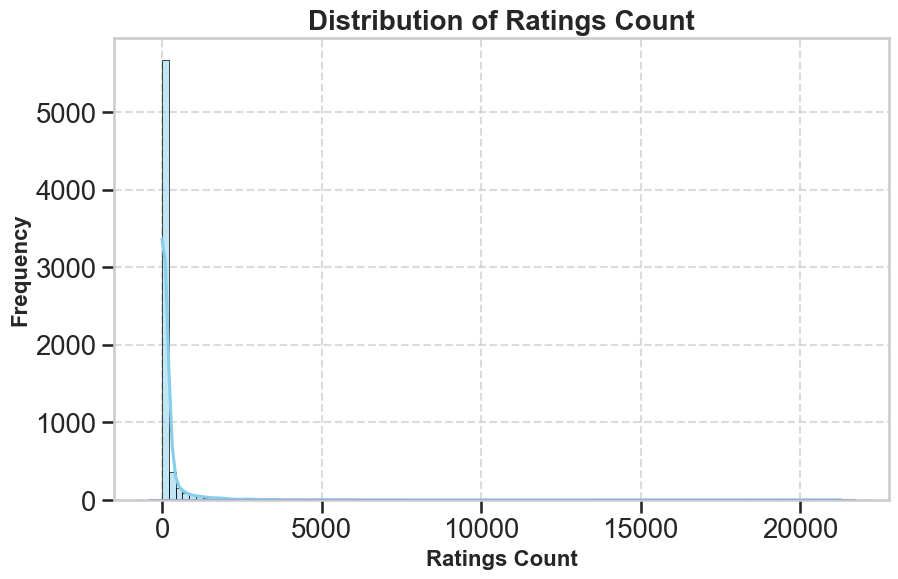

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure 'ratings_count' column exists and is numeric
if 'ratingCount' in df.columns:
    df['ratingCount'] = pd.to_numeric(df['ratingCount'], errors='coerce')

    # Set a style for the plot
    plt.style.use('seaborn-whitegrid')
    sns.set_context("talk", font_scale=1.2)

    # Plot the distribution of ratings count
    plt.figure(figsize=(10, 6))
    sns.histplot(df['ratingCount'].dropna(), bins=100, kde=True, color='skyblue', edgecolor='black')

    # Customize the plot
    plt.title('Distribution of Ratings Count', fontsize=20, weight='bold')
    plt.xlabel('Ratings Count', fontsize=16, weight='bold')
    plt.ylabel('Frequency', fontsize=16, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding KDE line with customization
    sns.kdeplot(df['ratingCount'].dropna(), color='blue', lw=2)

    # Show the plot
    plt.show()
else:
    print("The dataset does not contain a 'ratings_count' column.")
